In [1]:
## Importing Libraries

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Final_Dataset.xlsx to Final_Dataset.xlsx


In [ ]:
#del df

In [5]:
#df = pd.read_excel('Final_Dataset.xlsx')
df1 = pd.read_excel('Final_Dataset.xlsx', sheet_name='Sheet1')

In [8]:
df = df1.drop('Length', axis=1)
df.shape

(8547, 2)

In [9]:
df.head(4)

,SENTENCE,rating
0,parking is easy and the parking fee is reasonable,5
1,this is one of the best aquarium,5
2,i was blown away by the exhibits.,5
3,everything was so cool,4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8547 entries, 0 to 8546
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SENTENCE  8547 non-null   object
 1   rating    8547 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 133.7+ KB


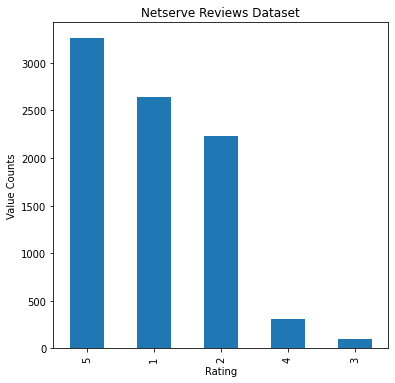

In [11]:
ax = df['rating'].value_counts().plot(kind='bar', figsize=(6,6))
fig = ax.get_figure()
ax.set_title("Netserve Reviews Dataset")
ax.set_xlabel('Rating')
ax.set_ylabel('Value Counts');

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df.describe()

,rating
count,8547.000000
mean,2.921727
std,1.747541
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,5.000000


DATA PRE-PROCESSING
Some of the common text preprocessing / cleaning steps are:

1. Lower casing
2. Removal of Punctuations
3. Removal of Stopwords
4. Removal of Frequent words
5. Removal of Rare words
6. Stemming
7. Lemmatization
8. Removal of emojis
9. Removal of emoticons
10. Conversion of emoticons to words
11. Conversion of emojis to words
12. Removal of URLs
13. Removal of HTML tags
14. Chat words conversion
15. Spelling correction

In [14]:
df['SENTENCE'] = df['SENTENCE'].astype(str)

In [15]:
# Convert to lowercase
df['SENTENCE_l'] = df['SENTENCE'].str.lower()

In [16]:
# Word Expansion
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they"
}

In [17]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 14.0 MB/s eta 0:00:00


In [18]:
import contractions as cont
def contractions(text):
    return cont.fix(text)

df['SENTENCE_l'] = df['SENTENCE_l'].apply(contractions)

In [19]:
# Dropping Null Values
df= df.dropna()

In [20]:
df.shape

(8547, 3)

In [21]:
df['SENTENCE_l'].head()

0    parking is easy and the parking fee is reasonable
1                     this is one of the best aquarium
2                    i was blown away by the exhibits.
3                               everything was so cool
4                              definitely worth seeing
Name: SENTENCE_l, dtype: object

In [22]:
# Remove punctuation and special characters
df['review_clean'] = df['SENTENCE_l'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [23]:
df.head()

,SENTENCE,rating,SENTENCE_l,review_clean
0,parking is easy and the parking fee is reasonable,5,parking is easy and the parking fee is reasonable,parking is easy and the parking fee is reasonable
1,this is one of the best aquarium,5,this is one of the best aquarium,this is one of the best aquarium
2,i was blown away by the exhibits.,5,i was blown away by the exhibits.,i was blown away by the exhibits
3,everything was so cool,4,everything was so cool,everything was so cool
4,definitely worth seeing,4,definitely worth seeing,definitely worth seeing


In [24]:
#Removal of the URL's from the dataset
import re
#df['review_clean'] = re.sub(r'http\S+', '', df['review_clean'])
df['review_non_url'] = df['review_clean'].apply(lambda x: re.sub(r'http\S+', '', x))

In [26]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622380 sha256=c8f3fe04af9976796046d466f4c8b603ae1d80c21e8f021c100be454a75c8ee1
  Stored in directory: /root/.cache/pip/wheels/ab/0f/23/3c010c3fd877b962146e7765f9e9b08026cac8b035094c5750
Successfully built autocorrect


In [27]:
#!pip install autocorrect

from autocorrect import Speller

# Create a Speller object
spell = Speller(lang='en')

# Apply spelling correction to each row in the 'review_l' column
df['review_AC'] = df['review_clean'].apply(lambda x: spell(x))


In [30]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
# Tokenize the text
import nltk
from nltk.tokenize import word_tokenize
df['tokens'] = df['review_AC'].apply(lambda x: word_tokenize(x))

In [241]:
df.head()

,review,rating,review_l,review_clean,review_AC,tokens
0,Lost in Hartsfield I swear I hate ATL airport ...,1,lost in hartsfield i swear i hate atl airport ...,lost in hartsfield i swear i hate atl airport ...,lost in hartsfield i swear i hate atl airport ...,"[lost, in, hartsfield, i, swear, i, hate, atl,..."
1,Atlanta airport trash ðŸ˜«,1,atlanta airport trash,atlanta airport trash,atlanta airport trash,"[atlanta, airport, trash]"
2,"flight got fucking canceled, might have to spe...",1,flight got fucking canceled might have to spen...,flight got fucking canceled might have to spen...,flight got fucking canceled might have to spen...,"[flight, got, fucking, canceled, might, have, ..."
3,"Disgusting. Took one bite, spit it out and th...",1,disgusting took one bite spit it out and thre...,disgusting took one bite spit it out and thre...,disgusting took one bite spit it out and thre...,"[disgusting, took, one, bite, spit, it, out, a..."
4,donâ€™t ever get lost in Atlanta airport the e...,1,dont ever get lost in atlanta airport the empl...,dont ever get lost in atlanta airport the empl...,dont ever get lost in atlanta airport the empl...,"[dont, ever, get, lost, in, atlanta, airport, ..."


In [149]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [35]:
import nltk
from nltk.stem import WordNetLemmatizer

# Create an instance of the WordNetLemmatizer class
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a sentence
def lemmatize_sentence(sentence):
    words = nltk.word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return ' '.join(lemmatized_words)

# Apply the lemmatize_sentence function to the 'review' column of the DataFrame
df['review_AC'] = df['review_AC'].apply(lemmatize_sentence)

In [36]:
df.head()

,SENTENCE,rating,SENTENCE_l,review_clean,review_non_url,review_AC,tokens
0,parking is easy and the parking fee is reasonable,5,parking is easy and the parking fee is reasonable,parking is easy and the parking fee is reasonable,parking is easy and the parking fee is reasonable,park be easy and the park fee be reasonable,"[parking, is, easy, and, the, parking, fee, is..."
1,this is one of the best aquarium,5,this is one of the best aquarium,this is one of the best aquarium,this is one of the best aquarium,this be one of the best aquarium,"[this, is, one, of, the, best, aquarium]"
2,i was blown away by the exhibits.,5,i was blown away by the exhibits.,i was blown away by the exhibits,i was blown away by the exhibits,i be blow away by the exhibit,"[i, was, blown, away, by, the, exhibits]"
3,everything was so cool,4,everything was so cool,everything was so cool,everything was so cool,everything be so cool,"[everything, was, so, cool]"
4,definitely worth seeing,4,definitely worth seeing,definitely worth seeing,definitely worth seeing,definitely worth see,"[definitely, worth, seeing]"


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['review_AC'])
y = df['rating']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = LogisticRegression()

In [39]:
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred = model.predict(X_test)


In [41]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.59      0.67      0.63       542
           2       0.50      0.47      0.49       433
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        63
           5       0.85      0.90      0.88       649

    accuracy                           0.68      1710
   macro avg       0.39      0.41      0.40      1710
weighted avg       0.64      0.68      0.66      1710



In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)



Confusion Matrix:
 [[365 148   0   0  29]
 [192 203   0   0  38]
 [ 12   7   0   0   4]
 [ 13  16   0   0  34]
 [ 32  28   1   1 587]]


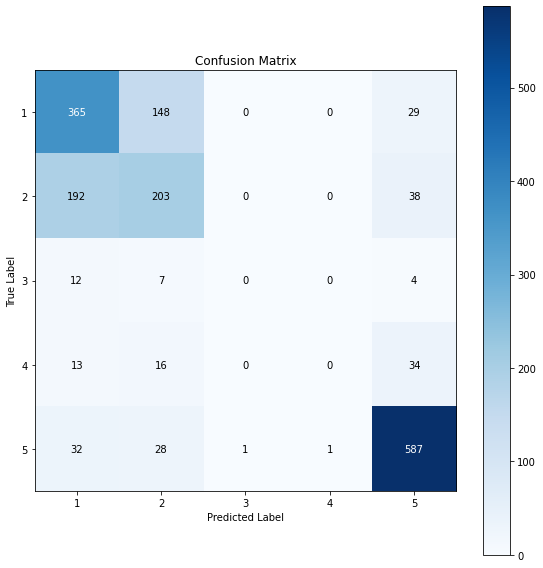

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix')
plt.colorbar(im)
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, sorted(set(y_test)))
plt.yticks(tick_marks, sorted(set(y_test)))

# Add text annotations inside the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
fig.tight_layout()
plt.show()

In [255]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data)
y = label_data

In [ ]:
logreg = LogisticRegression(C = 6866.498, random_state = 0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

In [256]:
print("Classification Report:\n",classification_report(y_test, y_pred))

NameError: ignored